In [12]:
import psycopg2
import pandas as pd

In [13]:
conn = psycopg2.connect("dbname=gregorian user=codex")
conn.set_client_encoding('UTF8')
cursor = conn.cursor()

In [14]:
# query

'''cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                WHERE office_part LIKE \'in\'
                LIMIT 5;
               """)'''
cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                LIMIT 5;
               """)

In [17]:
# get first chant

txt = cursor.fetchone()

In [18]:
chant = eval(txt[0])

# FUNCTIONS

In [19]:
import re
        

def find_all_groups(chant):
    """
    find only neumes
    """
    # esclude anche le chiavi
    # pattern = re.compile('(\([^\(\):;,0-9]*\))')
    pattern = re.compile('(\([^\(\)]*\)\s*)')
    allneumes = re.findall(pattern, chant)
    #allneumes = [clean_neuma(neuma) for neuma in allneumes]
    return allneumes

def clean_neuma(neuma):
    # elimina le parentesi tonde e riduce tutto in minuscolo
    neuma = re.sub('[\(|\)]','', neuma).lower()
    # elimina i seguenti caratteri: ~<>owvVsr._'!
    neuma = re.sub('[~<>owvVsr._\'!\s/\\\\r\\\\n]','', neuma)
    return neuma

In [20]:
whole_chant = ''.join(find_all_groups(chant))
whole_chant

"(c4) (f)(fgf__)(f.) (,) (f) (fg)(ghf)(fgf__)(f.) (ffhg)(f)(fgf__)(f.) (;) (d) (ffg)(f)(f) (f)(f)(fd/ffd)(d_c) (d) (ffg)(fg/hg/h_g) (f)(fg!hvGF'g)(gf..) (::) (gf~)(fff/hg/h_g)(fg!hvGF'g)(gf..) (::)"

In [21]:
def periods(chant):
    periods = []
    pattern = re.compile('\(::\)')
    #chant = re.findall(pattern, chant)
    chant = re.split(pattern, chant)
    chant = [c.strip(None) for c in chant if c != '']
    return chant

In [22]:
period = periods(whole_chant)
period

["(c4) (f)(fgf__)(f.) (,) (f) (fg)(ghf)(fgf__)(f.) (ffhg)(f)(fgf__)(f.) (;) (d) (ffg)(f)(f) (f)(f)(fd/ffd)(d_c) (d) (ffg)(fg/hg/h_g) (f)(fg!hvGF'g)(gf..)",
 "(gf~)(fff/hg/h_g)(fg!hvGF'g)(gf..)"]

In [ ]:
a = ['qwe','ddd','']

In [23]:
import networkx as nx

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 4, 0), (1, 3, 0), (1,5,0)])
list(DG.successors(1))

[4, 3, 5]

In [ ]:
import matplotlib.pyplot as plt
nx.draw(DG, with_labels=True)
plt.subplot()

In [ ]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [30]:
import networkx as nx

DG = nx.DiGraph()
#DG.add_weighted_edges_from([(1, 4, 0), (1, 3, 0), (1,5,0)])
#list(DG.successors(1))
DG.add_nodes_from([1,2])
DG.add_nodes_from([2,3])
DG.add_nodes_from([3,4])
DG.add_nodes_from([1,3])
DG.add_nodes_from([2,4])

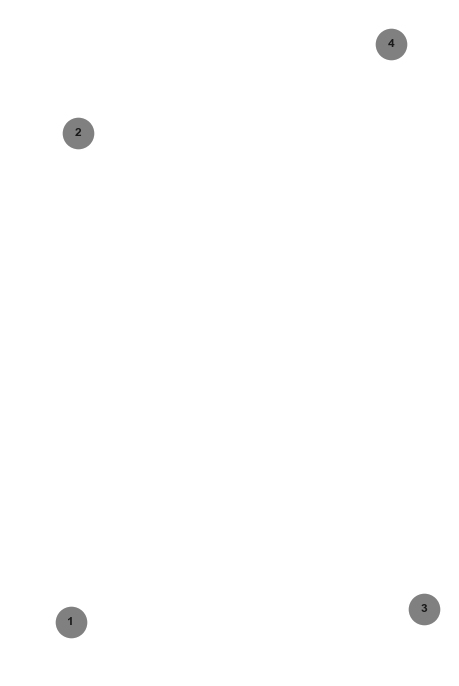

In [31]:
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,12)})

plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold', node_size=1000, node_color='grey',linewidths=0.0)
#plt.subplot(122)
plt.show()